<a href="https://colab.research.google.com/github/johnOliveiraLima/clima_change/blob/main/Agro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

link do kaggle: https://www.kaggle.com/datasets/marcelobatalhah/discover-so-paulo-apartment-prices-insights

In [2]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Base da dados do impacto do clima na agricultura

## Leitura dos dados com Pandas

In [3]:
path = '/content/drive/MyDrive/Coder/climate_change_impact_on_agriculture_2024.csv'

In [4]:
df = pd.read_csv(path)

Tamanho do dataframe

# Descrições das Variáveis

| **Variável**                           | **Descrição**                                                                                                 |
|----------------------------------------|---------------------------------------------------------------------------------------------------------------|
| **Year**                               | O ano em que os dados foram coletados ou analisados.                                                         |
| **Country**                            | O nome do país onde os dados se referem.                                                                      |
| **Region**                             | A região geográfica em que o país está localizado.                                                           |
| **Crop_Type**                          | O tipo de cultura ou plantação que está sendo analisada.                                                     |
| **Average_Temperature_C**             | A temperatura média (em graus Celsius) durante o período de cultivo.                                         |
| **Total_Precipitation_mm**             | A quantidade total de precipitação (chuva) recebida, medida em milímetros.                                  |
| **CO2_Emissions_MT**                  | A quantidade total de emissões de dióxido de carbono (CO₂) geradas, medida em milhões de toneladas (MT).    |
| **Crop_Yield_MT_per_HA**              | A produtividade das culturas, medida em toneladas por hectare (HA).                                          |
| **Extreme_Weather_Events**            | Eventos climáticos extremos que ocorreram durante o período analisado.                                       |
| **Irrigation_Access_%**               | A porcentagem da área cultivada que tem acesso à irrigação.                                                  |
| **Pesticide_Use_KG_per_HA**           | A quantidade de pesticidas utilizada por hectare, medida em quilogramas.                                     |
| **Fertilizer_Use_KG_per_HA**          | A quantidade de fertilizantes utilizada por hectare, medida em quilogramas.                                   |
| **Soil_Health_Index**                  | Um índice que representa a saúde do solo.                                                                     |
| **Adaptation_Strategies**             | Estratégias adotadas para se adaptar a mudanças climáticas.                                                  |
| **Economic_Impact_Million_USD**       | O impacto econômico estimado em milhões de dólares americanos.                                               |


# Descrições das Variáveis



# Análise dos dados

In [5]:
df.shape

(10000, 15)

A minha base conta com 10 mil linhas, ou seja, 10 mil registros de impactos da temperatura na agricultura, representados pelas 15 colunas, que representam suas variáveis

In [6]:
df.sample(5)

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
2935,2008,Russia,Northwestern,Rice,23.75,668.20,12.77,1.970,10,35.05,20.36,55.30,63.14,No Adaptation,538.31
4601,1995,India,Maharashtra,Coffee,-0.32,1141.19,3.21,1.380,9,66.82,29.42,18.50,68.00,Crop Rotation,151.83
3561,1994,Brazil,Northeast,Coffee,10.61,2413.23,28.33,2.565,5,16.32,45.27,64.64,75.81,Water Management,1253.50
7607,2007,Argentina,Northwest,Rice,12.71,2389.79,18.03,4.203,7,13.52,20.13,52.28,95.55,Organic Farming,2031.56
1616,2011,Russia,Northwestern,Soybeans,2.10,578.13,5.98,1.420,1,41.41,15.20,95.86,75.50,Organic Farming,621.98


In [7]:
df.columns

Index(['Year', 'Country', 'Region', 'Crop_Type', 'Average_Temperature_C',
       'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
       'Extreme_Weather_Events', 'Irrigation_Access_%',
       'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
       'Soil_Health_Index', 'Adaptation_Strategies',
       'Economic_Impact_Million_USD'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            10000 non-null  float64
 13  Adaptation_Strate

A usar a função info() podemos chegar a algumas conclusões:
  * Não há valores núlos em nehumas das minhas colunas.
  * Todos os dados estão com o seu tipo correto.

# Considerações sobre os dados

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,10000.0,2007.088700,10.084245,1990.00,1999.0000,2007.000,2016.0000,2024.00
Average_Temperature_C,10000.0,15.241299,11.466955,-4.99,5.4300,15.175,25.3400,35.00
Total_Precipitation_mm,10000.0,1611.663834,805.016815,200.15,925.6975,1611.160,2306.9975,2999.67
CO2_Emissions_MT,10000.0,15.246608,8.589423,0.50,7.7600,15.200,22.8200,30.00
Crop_Yield_MT_per_HA,10000.0,2.240017,0.998342,0.45,1.4490,2.170,2.9300,5.00
Extreme_Weather_Events,10000.0,4.980900,3.165808,0.00,2.0000,5.000,8.0000,10.00
Irrigation_Access_%,10000.0,55.248332,25.988305,10.01,32.6775,55.175,77.5825,99.99
Pesticide_Use_KG_per_HA,10000.0,24.955735,14.490962,0.00,12.5275,24.930,37.4700,49.99
Fertilizer_Use_KG_per_HA,10000.0,49.973708,28.711027,0.01,25.3900,49.635,74.8250,99.99
Soil_Health_Index,10000.0,64.901278,20.195882,30.00,47.2350,64.650,82.4725,100.00


In [10]:
df.describe(include=['object']).T

,count,unique,top,freq
Country,10000,10,USA,1032
Region,10000,34,South,754
Crop_Type,10000,10,Wheat,1047
Adaptation_Strategies,10000,5,Water Management,2049


# Análise Univariada

## Variáveis numéricas

In [87]:
# Colunas numéricas
numerical_columns = [
    i for i in df.columns
    if np.issubdtype(df[i].dtype, np.number) or np.issubdtype(df[i].dtype, np.datetime64)]
print(numerical_columns)

['Year', 'Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA', 'Extreme_Weather_Events', 'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index', 'Economic_Impact_Million_USD']


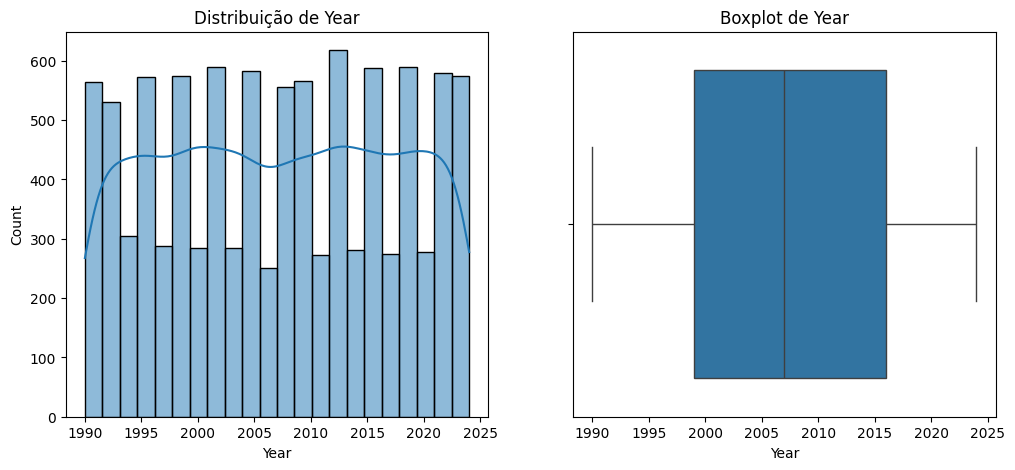

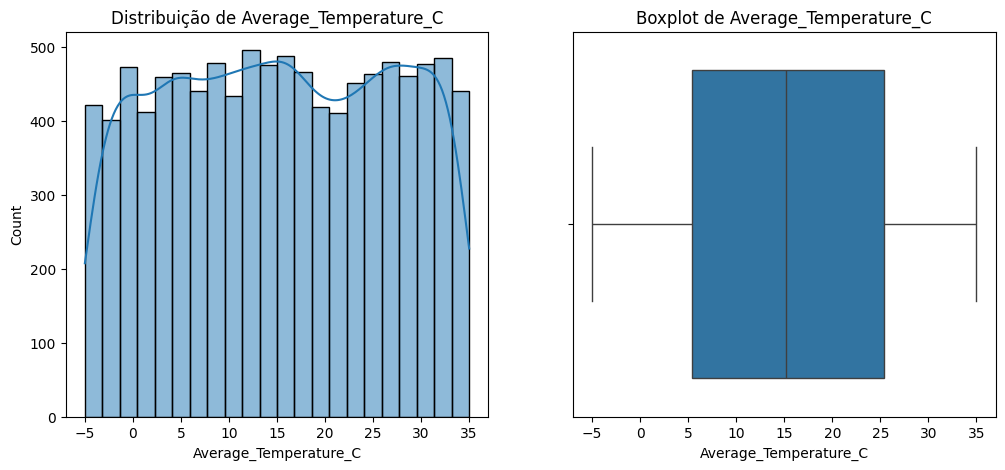

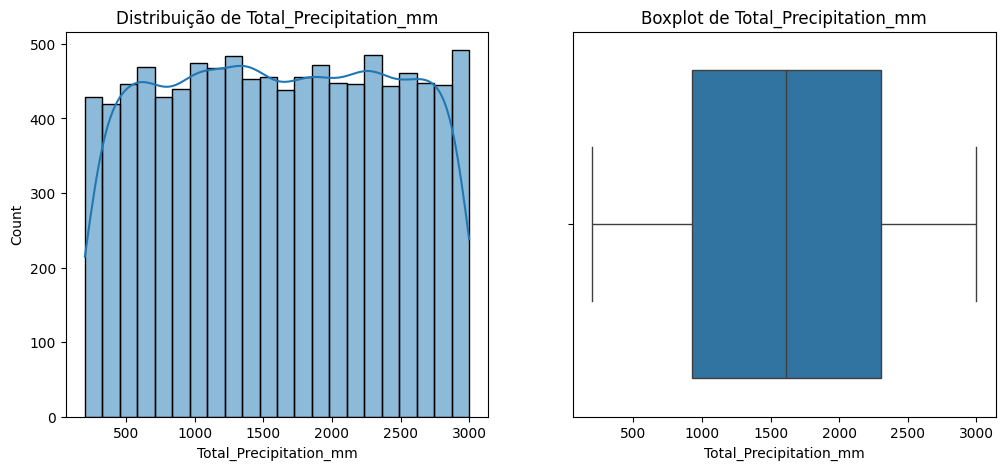

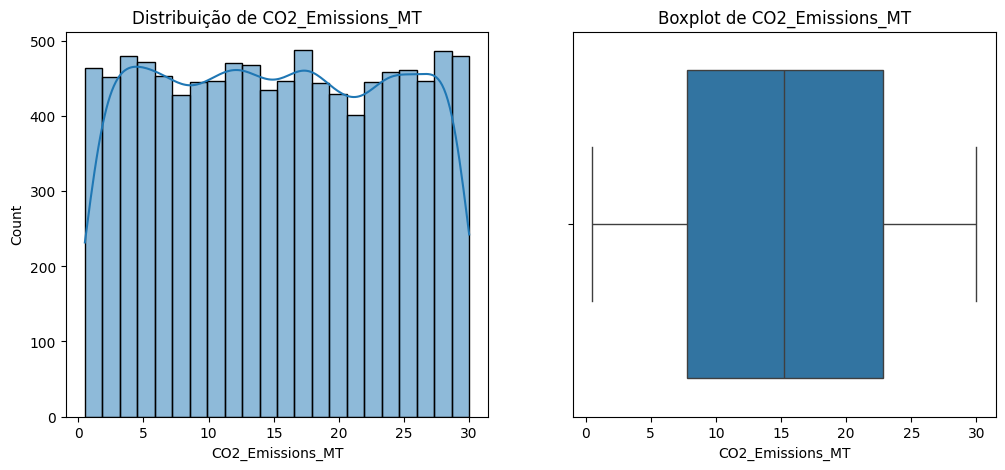

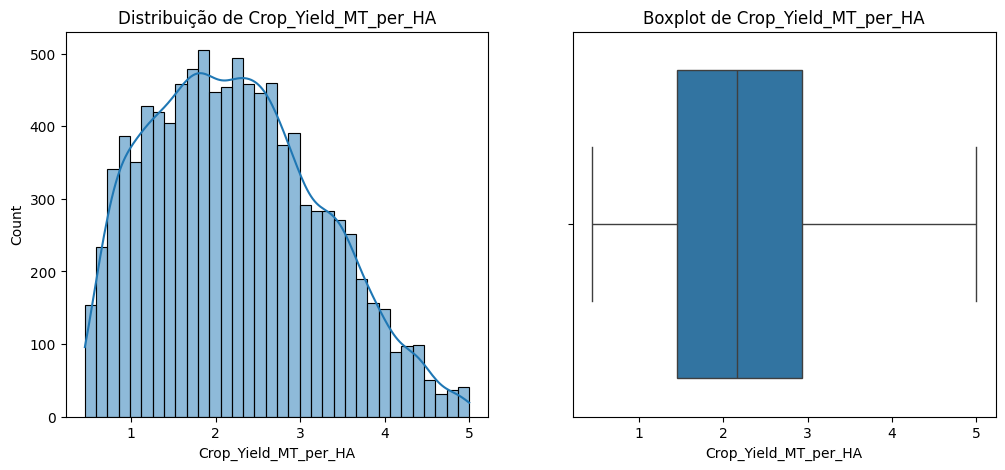

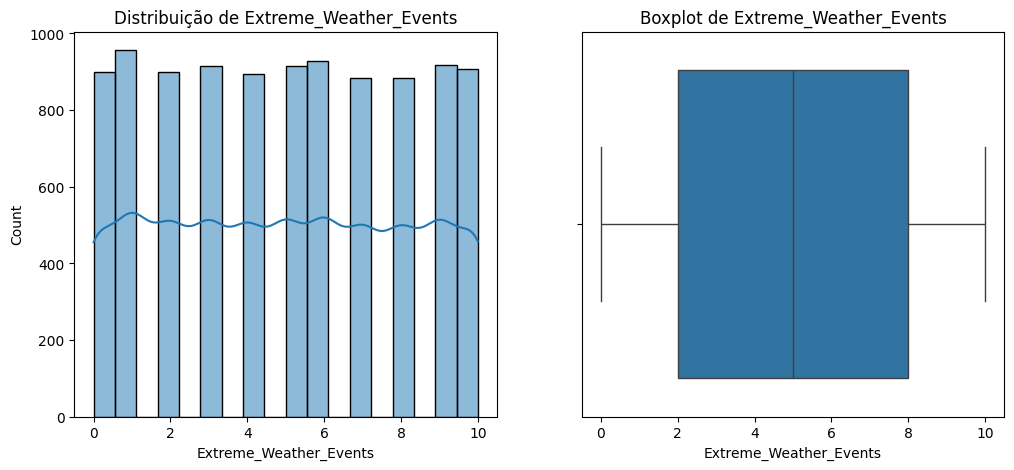

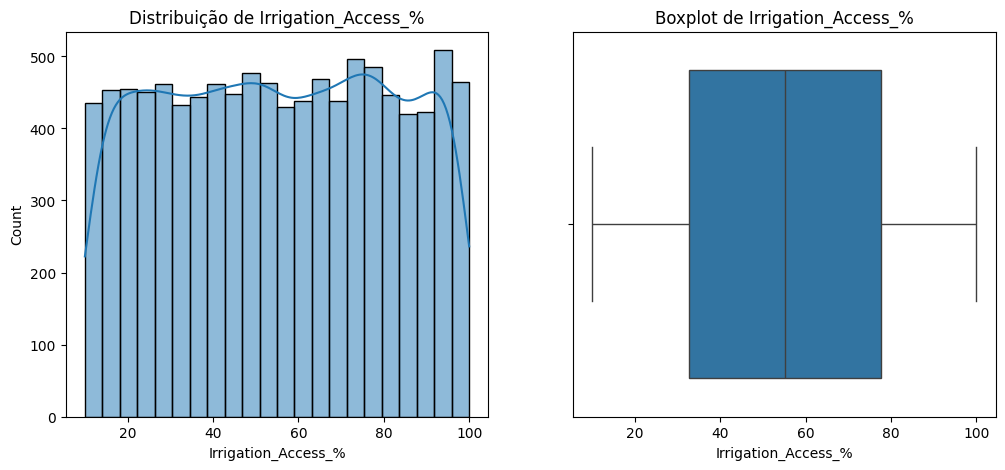

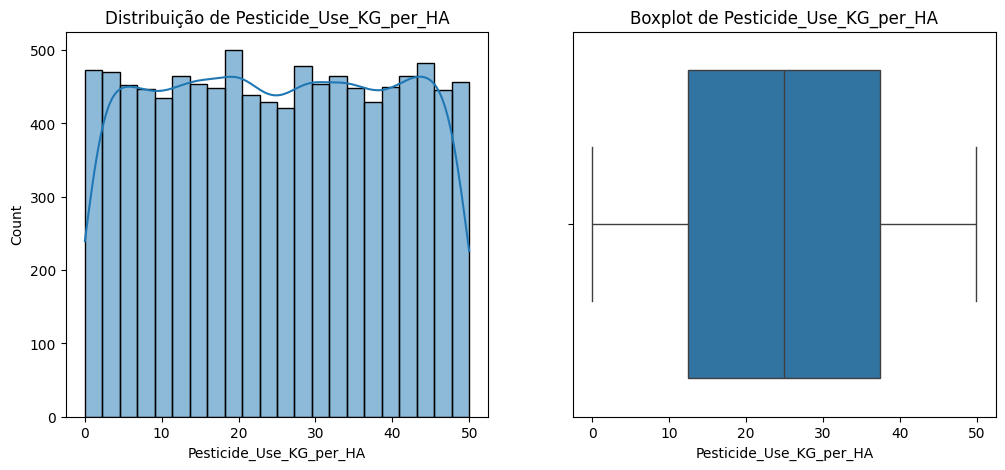

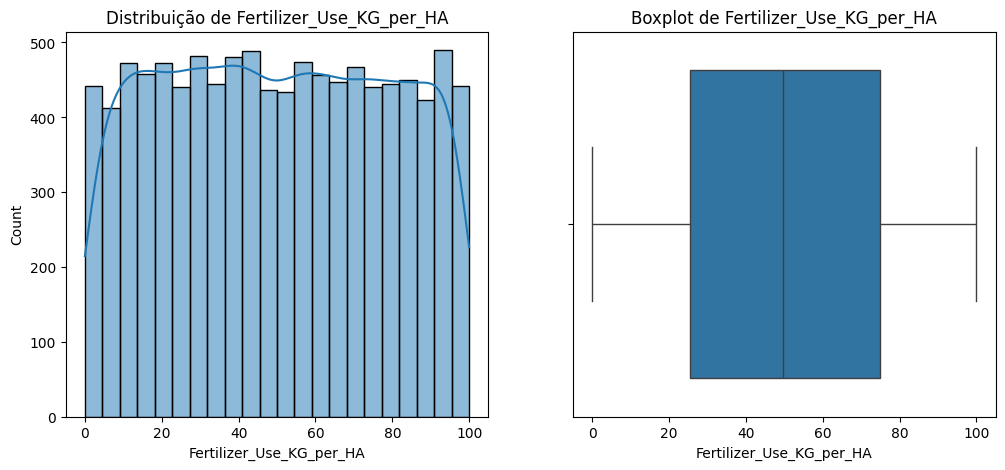

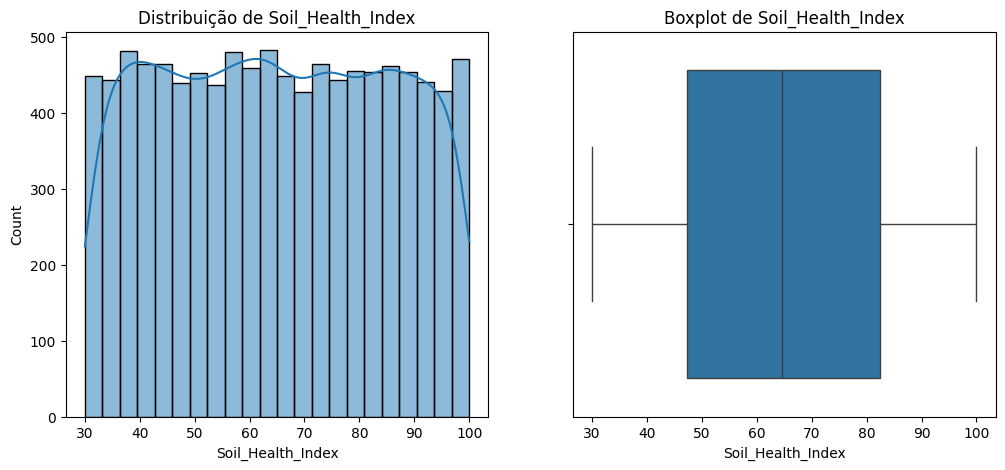

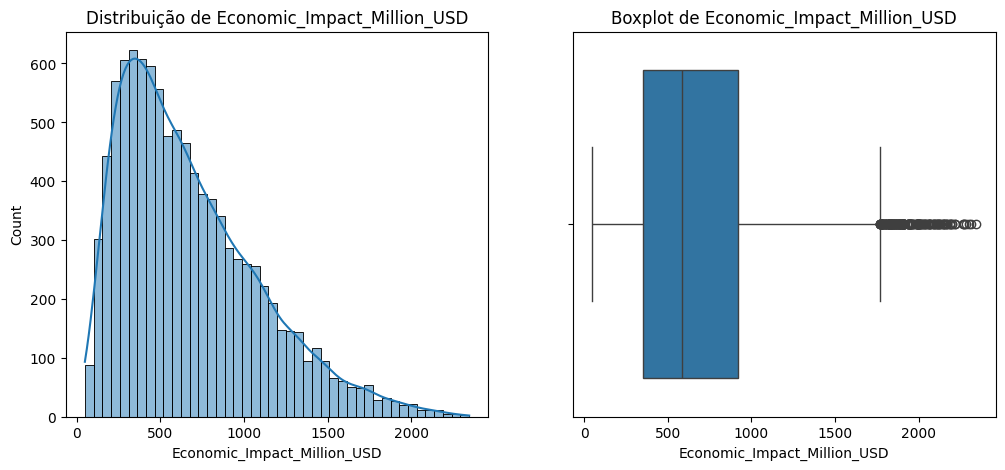

In [88]:
# Histograma e Boxplot para cada variável numérica
for feature in numerical_columns:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribuição de {feature}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot de {feature}')
    plt.show()


## Variáveis Categóricas

In [89]:
df.columns

Index(['Year', 'Country', 'Region', 'Crop_Type', 'Average_Temperature_C',
       'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
       'Extreme_Weather_Events', 'Irrigation_Access_%',
       'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
       'Soil_Health_Index', 'Adaptation_Strategies',
       'Economic_Impact_Million_USD'],
      dtype='object')

In [94]:
object_columns = ['Country','Crop_Type','Adaptation_Strategies']

In [96]:
for feature in object_columns:
    print(f"Distribuição de valores para '{feature}':")
    print(df[feature].value_counts())  # Mostra as categorias e suas frequências
    print("\n" + "-" * 50 + "\n")


Distribuição de valores para 'Country':
Country
USA          1032
Australia    1032
China        1031
Nigeria      1029
India        1025
Canada        984
Argentina     984
France        978
Russia        961
Brazil        944
Name: count, dtype: int64

--------------------------------------------------

Distribuição de valores para 'Crop_Type':
Crop_Type
Wheat         1047
Cotton        1044
Vegetables    1036
Corn          1022
Rice          1022
Sugarcane      995
Fruits         979
Soybeans       958
Barley         952
Coffee         945
Name: count, dtype: int64

--------------------------------------------------

Distribuição de valores para 'Adaptation_Strategies':
Adaptation_Strategies
Water Management           2049
No Adaptation              2024
Drought-resistant Crops    1995
Organic Farming            1975
Crop Rotation              1957
Name: count, dtype: int64

--------------------------------------------------



<ipython-input-98-b81afb7bbebd>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




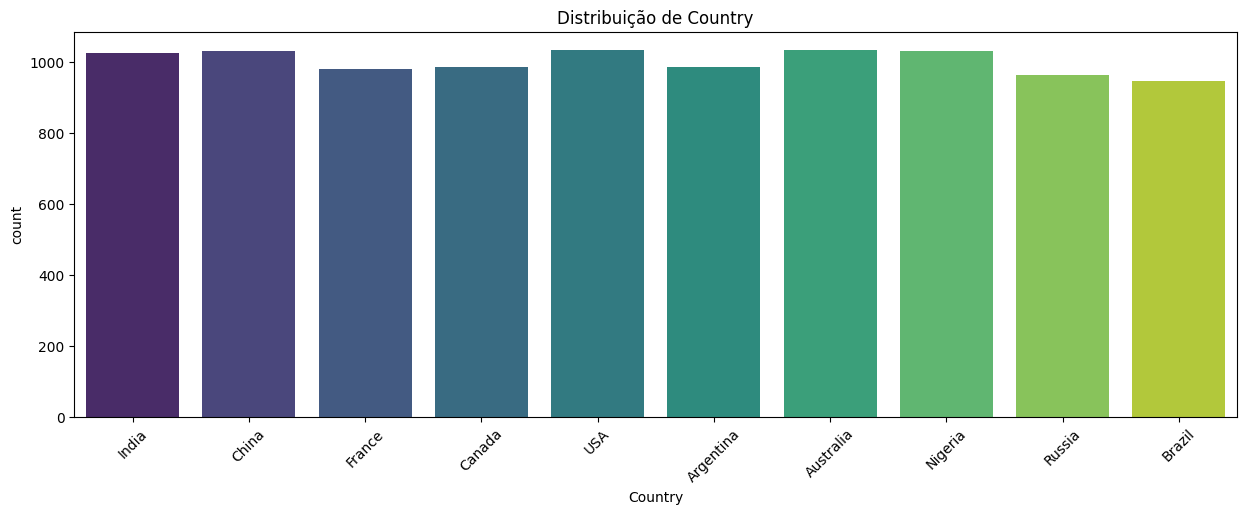

<ipython-input-98-b81afb7bbebd>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




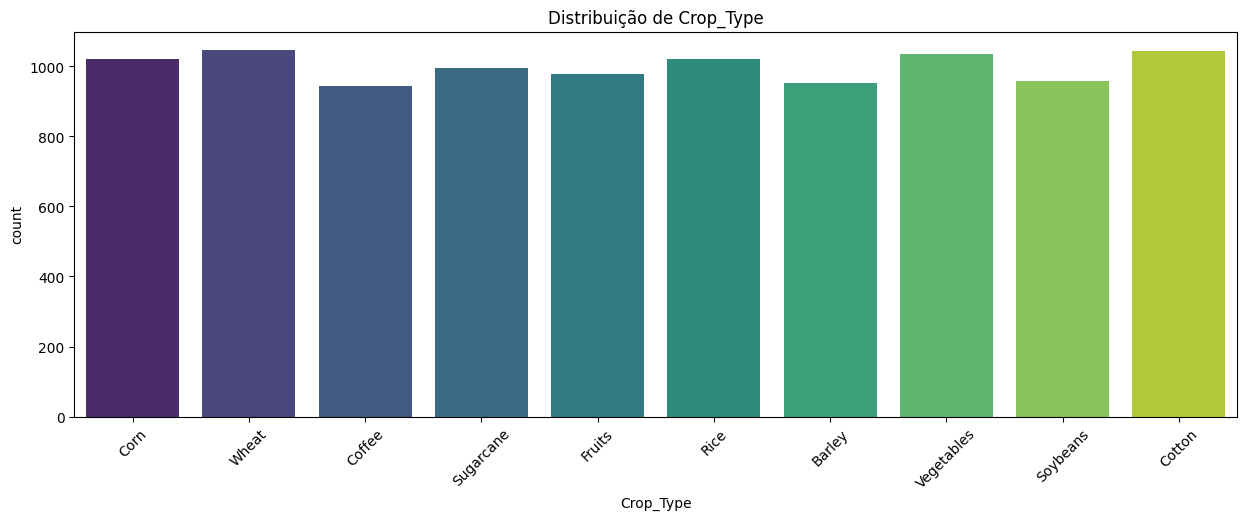

<ipython-input-98-b81afb7bbebd>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




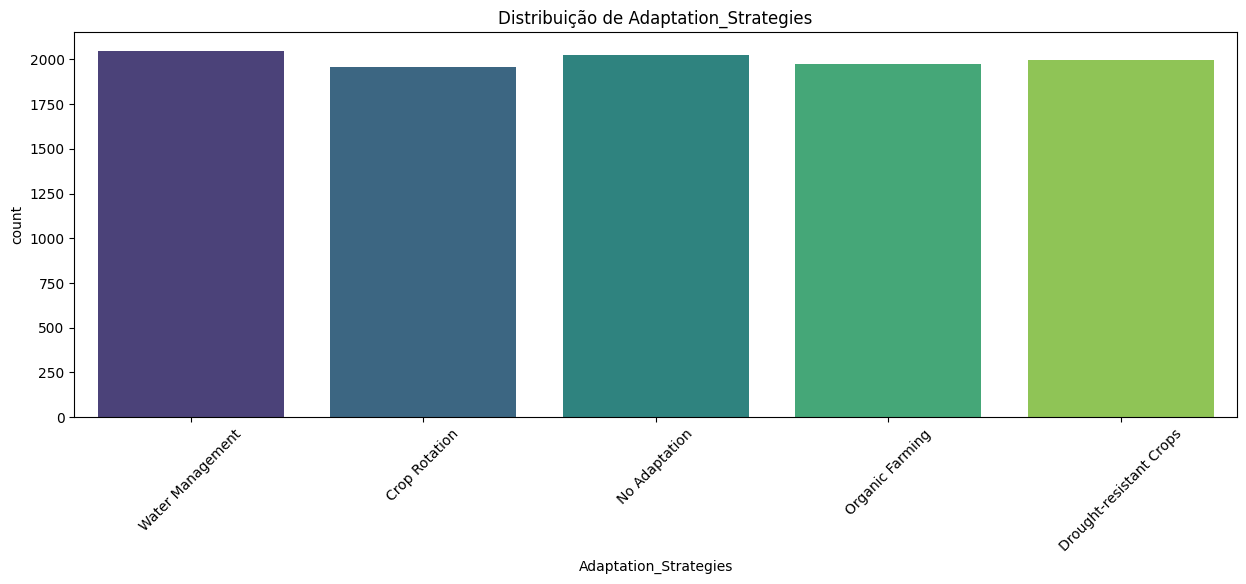

In [98]:
for feature in object_columns:
    plt.figure(figsize=(15, 5))
    sns.countplot(data=df, x=feature, palette="viridis")
    plt.title(f'Distribuição de {feature}')
    plt.xticks(rotation=45)
    plt.show()

# Questões relevantes:
1 - Qual cultura tem o melhor impacto econômico por páis

In [62]:
result=df.groupby(['Country', 'Crop_Type'])['Economic_Impact_Million_USD'].sum() .reset_index()

In [68]:
# Agora, para cada país, filtrar o tipo de cultivo com maior impacto econômico
top_crop_per_country = result.loc[
    result.groupby('Country')['Economic_Impact_Million_USD'].idxmax()
]

# Ordenar o resultado por impacto econômico (opcional)
top_crop_per_country = top_crop_per_country.sort_values(by='Economic_Impact_Million_USD', ascending=False)

print(top_crop_per_country)

      Country  Crop_Type  Economic_Impact_Million_USD
77    Nigeria  Sugarcane                     88295.79
39     Canada      Wheat                     88172.59
67      India  Sugarcane                     84616.64
14  Australia     Fruits                     83798.73
29     Brazil      Wheat                     80272.45
91        USA     Coffee                     80195.23
45      China       Rice                     79416.98
7   Argentina  Sugarcane                     75716.64
54     France     Fruits                     75565.92
82     Russia       Corn                     72631.45


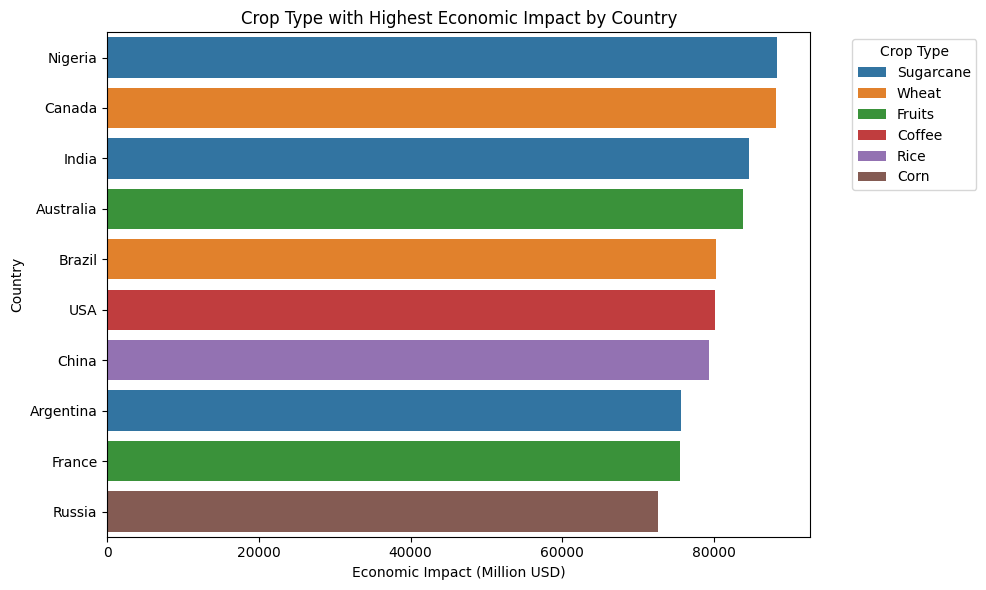

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_crop_per_country,
    x='Economic_Impact_Million_USD',
    y='Country',
    hue='Crop_Type',
    dodge=False  # Para evitar barras separadas por cultivo
)

# Adicionar títulos e rótulos
plt.title('Crop Type with Highest Economic Impact by Country')
plt.xlabel('Economic Impact (Million USD)')
plt.ylabel('Country')
plt.legend(title='Crop Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


2 - Qual cultura tem o melhor rendimento agrícola por país

In [76]:
result=df.groupby(['Country', 'Crop_Type'])['Crop_Yield_MT_per_HA'].sum() .reset_index()

In [85]:
# Agora, para cada país, filtrar o tipo de cultivo com maior impacto econômico
top_crop_per_country = result.loc[
    result.groupby('Country')['Crop_Yield_MT_per_HA'].idxmax()
]

# Ordenar o resultado por impacto econômico (opcional)
top_crop_per_country = top_crop_per_country.sort_values(by='Crop_Yield_MT_per_HA', ascending=False)

print(top_crop_per_country)

      Country  Crop_Type  Crop_Yield_MT_per_HA
77    Nigeria  Sugarcane               287.262
39     Canada      Wheat               283.216
14  Australia     Fruits               281.029
29     Brazil      Wheat               274.778
91        USA     Coffee               269.013
45      China       Rice               261.688
67      India  Sugarcane               256.300
54     France     Fruits               252.994
7   Argentina  Sugarcane               247.826
85     Russia       Rice               230.125


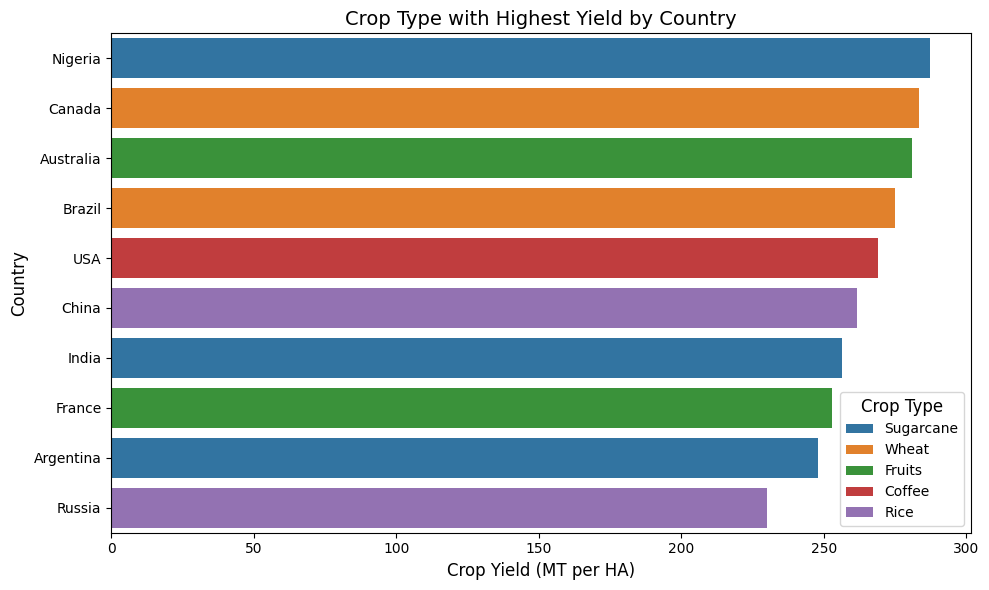

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_crop_per_country,
    x='Crop_Yield_MT_per_HA',  # Agora o eixo x representa o rendimento agrícola
    y='Country',
    hue='Crop_Type',
    dodge=False  # Evitar barras separadas por cultivo
)

# Adicionar títulos e rótulos
plt.title('Crop Type with Highest Yield by Country', fontsize=14)
plt.xlabel('Crop Yield (MT per HA)', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Ajustar a legenda
plt.legend(
    title='Crop Type',  # Título da legenda
    title_fontsize=12,  # Tamanho da fonte do título da legenda
    loc='lower right',  # Posição da legenda
    bbox_to_anchor=(1, 0),  # Ajuste da posição fora do gráfico
    fontsize=10  # Tamanho da fonte dos itens da legenda
)

plt.tight_layout()
plt.show()


## Correlação das variáveis

<Axes: >

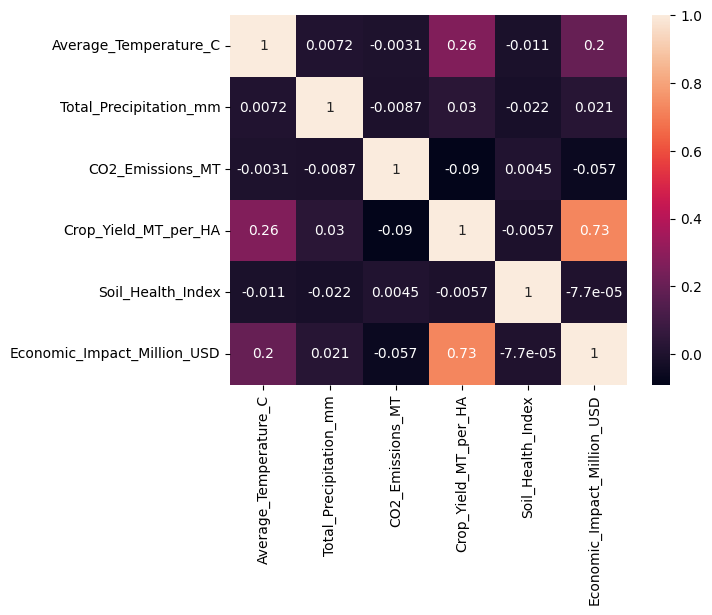

In [39]:
# Correação
variables = ['Average_Temperature_C',
             'Total_Precipitation_mm',
             'CO2_Emissions_MT',
             'Crop_Yield_MT_per_HA',
             'Soil_Health_Index',
             'Economic_Impact_Million_USD']
sns.heatmap(df[variables].corr(), annot = True)